<a href="https://colab.research.google.com/github/15021996/Bank-Marketing-Effectiveness-Prediction/blob/main/Soumya_Bank_Marketing_Effectiveness_Prediction_Capstone_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### <b> Social and economic context attributes </b>
* ### emp.var.rate: employment variation rate - quarterly indicator (numeric)
* ### cons.price.idx: consumer price index - monthly indicator (numeric)
* ### cons.conf.idx: consumer confidence index - monthly indicator (numeric)
* ### euribor3m: euribor 3 month rate - daily indicator (numeric)
* ### nr.employed: number of employees - quarterly indicator (numeric)

### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

In [111]:
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
# Function to do Gridsearch_CV, To be used with Load and Store Fucnction
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
import time
from sklearn.model_selection import train_test_split
def gscv(model_dict,X,y):
  '''
  Input model_dict = {model_name:[model,param_dict,scoring_]
  '''
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)
  models = {'model': [], 'train_time': [],'train_accuracy': [], 'train_precision': [], 'train_recall': [], 'train_f1_score': [], 'train_tn fp fn tp': [], 'train_auc_roc': [], 'test_accuracy': [], 'test_precision': [], 'test_recall': [], 'test_f1_score': [], 'test_tn fp fn tp': [], 'test_auc_roc': []}
  for k in model_dict.keys():
    gs_model = GridSearchCV(estimator = model_dict[k][0], param_grid= model_dict[k][1], scoring=model_dict[k][2], n_jobs= -1,cv=5,)
    training_time = time.time()
    gs_model.fit(X_train,y_train)
    training_time = time.time() - training_time
    sm.save(gs_model,k)
    models['model'].append(k)
    models['train_time'].append(training_time)
    y_pred_test = gs_model.predict(X_test)
    y_pred_train = gs_model.predict(X_train)
    models['train_accuracy'].append(accuracy_score(y_train,y_pred_train))
    models['train_precision'].append(precision_score(y_train,y_pred_train))
    models['train_recall'].append(recall_score(y_train,y_pred_train))
    models['train_f1_score'].append(f1_score(y_train,y_pred_train))
    models['train_tn fp fn tp'].append(confusion_matrix(y_train,y_pred_train).flatten())
    models['train_auc_roc'].append(roc_auc_score(y_train,y_pred_train))
    models['test_accuracy'].append(accuracy_score(y_test,y_pred_test))
    models['test_precision'].append(precision_score(y_test,y_pred_test))
    models['test_recall'].append(recall_score(y_test,y_pred_test))
    models['test_f1_score'].append(f1_score(y_test,y_pred_test))
    models['test_tn fp fn tp'].append(confusion_matrix(y_test,y_pred_test).flatten())
    models['test_auc_roc'].append(roc_auc_score(y_test,y_pred_test))
  data = pd.DataFrame(models)
  sm.save(data,"Final Result")
  return data

In [112]:
confusion_matrix([0,0],[1,0]).flatten()

array([1, 1, 0, 0])

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
bank_market = pd.read_csv("/content/drive/MyDrive/AlmaBetter/CohortAravali/Cohort Aravali/Module 4/Week 2/bank-full.csv")

In [45]:
bank_market.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [46]:
bank_market.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


From the above description we can see that there is something not normal with 'pdays'.

## Exploratory Data Analysis

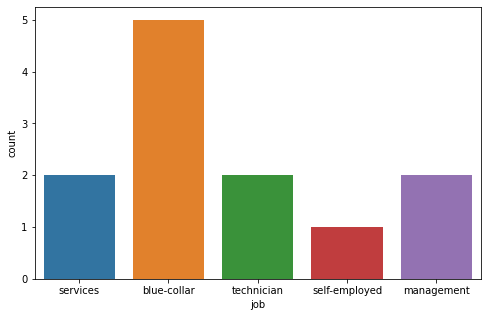

In [47]:
plt.figure(figsize=(8,5))
sns.countplot(x=bank_market.job.value_counts(),data=bank_market.job)

Text(0.5, 1.0, 'Ratio of acceptance and rejection')

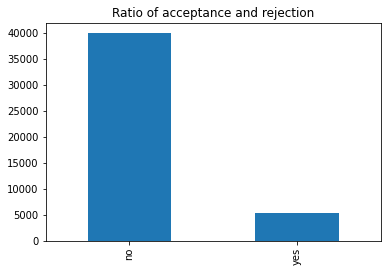

In [48]:
y=bank_market['y'].value_counts()
y.plot(kind='bar')
plt.title('Ratio of acceptance and rejection')

Text(0.5, 1.0, 'Distrubtion of balance of rejected customer')

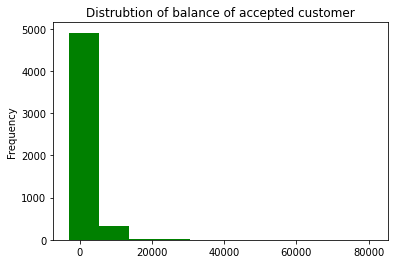

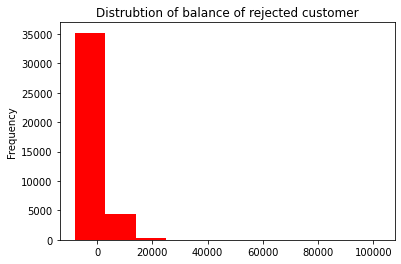

In [49]:
balance_yes=bank_market['balance'][bank_market.y=='yes']
balance_no=bank_market['balance'][bank_market.y=='no']
plt.figure()
balance_yes.plot(kind='hist',color='green')
plt.title('Distrubtion of balance of accepted customer')
plt.figure()
balance_no.plot(kind='hist',color='red')
plt.title('Distrubtion of balance of rejected customer')

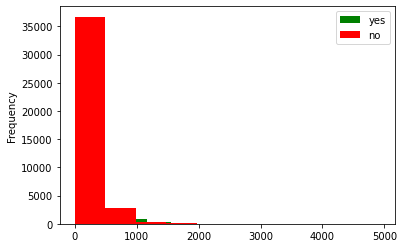

In [50]:
duration_yes=bank_market['duration'][bank_market.y=='yes']
duration_no=bank_market['duration'][bank_market.y=='no']
plt.figure()
duration_yes.plot(kind='hist',color='green')
duration_no.plot(kind='hist',color='red')
plt.legend(['yes','no'])

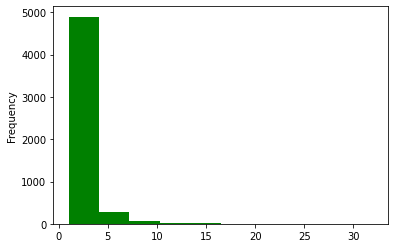

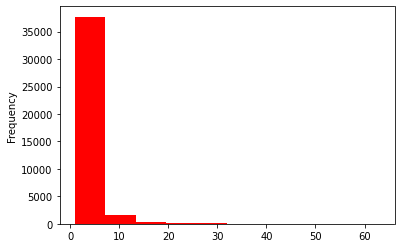

In [51]:
campaign_yes=bank_market['campaign'][bank_market.y=='yes']
campaign_no=bank_market['campaign'][bank_market.y=='no']
plt.figure()
campaign_yes.plot(kind='hist',color='green')
plt.figure()
campaign_no.plot(kind='hist',color='red')

## Looking closely into each feature.

1.**Duration**

In [52]:
 #Step 1: Change the unit of 'duration' from seconds to minutes
bank_market['duration'] = bank_market['duration'].apply(lambda n:n/60).round(2)

Should drop duration(futuristic feature)

In [53]:
bank_market.sort_values('campaign')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,4.35,1,-1,0,unknown,no
27794,43,management,married,tertiary,no,344,yes,yes,cellular,28,jan,4.70,1,238,2,failure,no
27793,30,management,single,tertiary,no,1572,no,no,cellular,28,jan,3.33,1,-1,0,unknown,no
27792,52,services,married,secondary,no,393,yes,yes,cellular,28,jan,7.43,1,182,8,failure,no
27791,57,services,divorced,primary,no,362,no,no,cellular,28,jan,1.52,1,231,1,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5459,35,blue-collar,married,secondary,no,430,yes,no,unknown,23,may,2.45,50,-1,0,unknown,no
4299,30,management,single,tertiary,no,358,yes,no,unknown,19,may,1.47,51,-1,0,unknown,no
5073,35,technician,married,secondary,no,432,yes,no,unknown,21,may,18.23,55,-1,0,unknown,no
11914,24,technician,single,primary,no,126,yes,no,unknown,20,jun,0.17,58,-1,0,unknown,no


In [54]:
bank_market[bank_market['balance']<0]['y'].value_counts()

no     3556
yes     210
Name: y, dtype: int64

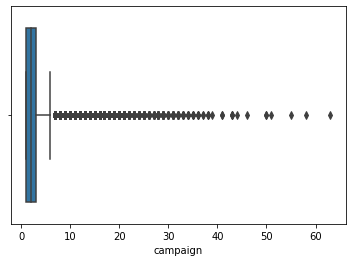

In [55]:
sns.boxplot(bank_market.campaign)

In [56]:
percentile_q1_balance = np.percentile(bank_market['campaign'],25)
print(percentile_q1_balance)
percentile_q2_balance = np.percentile(bank_market['campaign'],50)
print(percentile_q2_balance)
percentile_q3_balance = np.percentile(bank_market['campaign'],75)
print(percentile_q3_balance)

1.0
2.0
3.0


In [57]:
iqr=percentile_q3_balance - percentile_q1_balance
lower_limit_outlier=percentile_q1_balance-1.5*iqr
upper_limit_outlier=percentile_q3_balance+1.5*iqr
print("lower limit for outlier  :",lower_limit_outlier)
print("Upper limit for outlier  :",upper_limit_outlier)

lower limit for outlier  : -2.0
Upper limit for outlier  : 6.0


In [58]:
bank_market[(bank_market['campaign']>lower_limit_outlier)&(bank_market['campaign']<upper_limit_outlier)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,4.35,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,2.52,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1.27,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1.53,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,3.30,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,16.28,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,7.60,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,18.78,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,8.47,4,-1,0,unknown,no


In [59]:
from sklearn.ensemble import IsolationForest

In [60]:
def plot_cat_data(df,dep_var):
  cat_columns = list(set(df.describe().columns)^set(df.columns))
  cat_columns.remove(dep_var)
  for i,e in enumerate(cat_columns):
    plt.figure(i)
    ax = sns.countplot(df[e],hue=df[dep_var])
    for p in ax.patches:
      height = p.get_height()
      ax.text(p.get_x()+p.get_width()/2.,
              height + 3,
              '{:1.2f}'.format(height/df.shape[0]),
              ha="center")
    if(len(ax.patches)>10):
      plt.xticks(rotation=90)  
    plt.title(f'Count Plot for {e}')
    plt.show()

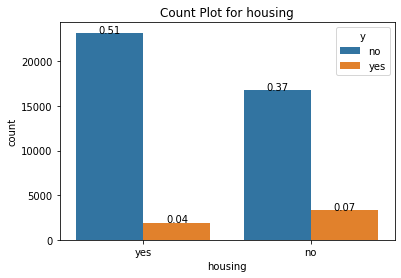

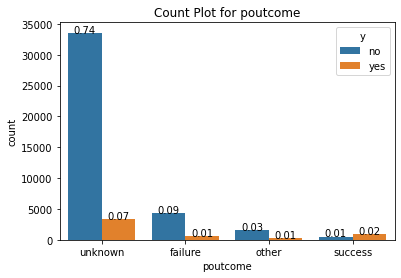

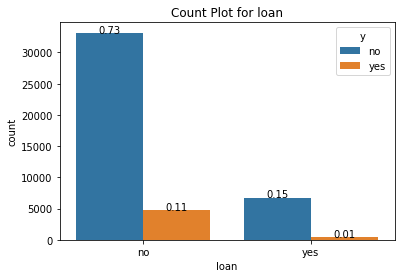

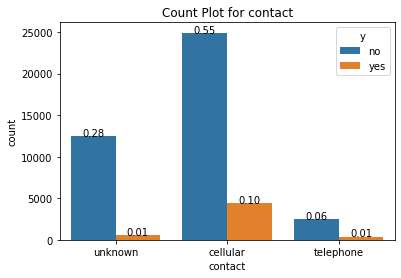

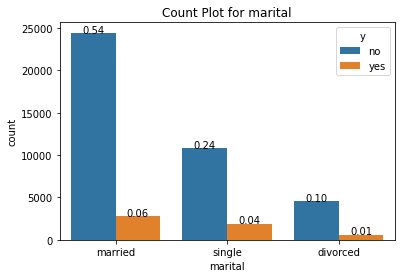

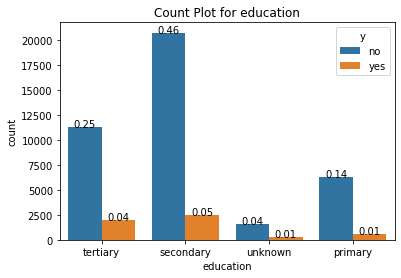

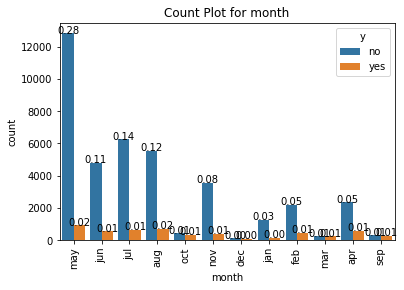

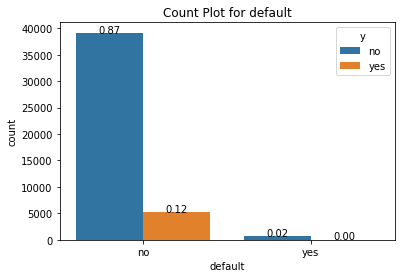

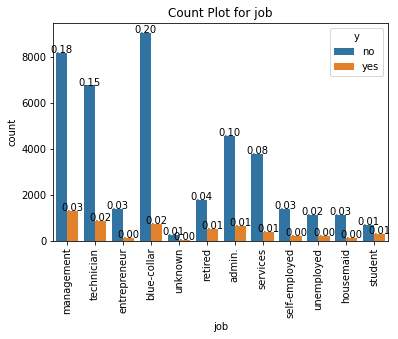

In [61]:
plot_cat_data(bank_market,'y')

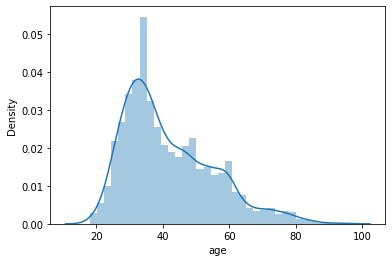

In [62]:
sns.distplot(bank_market[bank_market['y']=='yes']['age'])

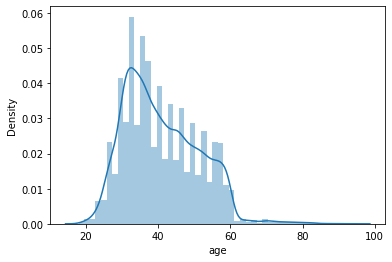

In [63]:
sns.distplot(bank_market[bank_market['y']=='no']['age'])

In [64]:
# Replacing yes, no to 1 and 0 for traget variable (y)
bank_market.y.replace({'no':0,'yes':1},inplace=True)

In [65]:
# distributing age in 4 bins.
def chanage(age):
  if age<=25:
    return "adult"
  elif age<=40:
    return 'uncle'
  elif age<=63:
    return 'retired'
  else:
    return 'counting_last_breaths' 

In [66]:
bank_market['cat_age'] = bank_market['age'].apply(chanage)

In [67]:
bank_market['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [68]:
# Combining some job roles and keeping in one category
def change_occ(occ):
  new_cat1 = ['technician','services']
  new_cat2 = ['blue-collar','admin.']
  new_cat3 = ['self-employed','housemaid','entrepreneur']
  if occ in new_cat1:
    return 'new_cat1'
  if occ in new_cat2:
    return 'new_cat2'
  if occ in new_cat3:
    return 'new_cat3'
  return occ

In [69]:
bank_market['new_job'] = bank_market.job.apply(change_occ)

In [70]:
#housing loan
bank_market.housing.replace({'no':0,'yes':1},inplace=True)

In [71]:
# some personal loan'
bank_market.loan.replace({'no':0,'yes':1},inplace=True)

In [72]:
#default
bank_market.default.replace({'no':0,'yes':1},inplace=True)

In [73]:
#mode of contact
bank_market.contact.replace({'unknown':0, 'cellular':1, 'telephone':1},inplace=True)

In [74]:
bank_market.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,cat_age,new_job
0,58,management,married,tertiary,0,2143,1,0,0,5,may,4.35,1,-1,0,unknown,0,retired,management
1,44,technician,single,secondary,0,29,1,0,0,5,may,2.52,1,-1,0,unknown,0,retired,new_cat1
2,33,entrepreneur,married,secondary,0,2,1,1,0,5,may,1.27,1,-1,0,unknown,0,uncle,new_cat3
3,47,blue-collar,married,unknown,0,1506,1,0,0,5,may,1.53,1,-1,0,unknown,0,retired,new_cat2
4,33,unknown,single,unknown,0,1,0,0,0,5,may,3.30,1,-1,0,unknown,0,uncle,unknown


In [75]:
cat_columns = ['marital','education','poutcome','cat_age','new_job']

In [76]:
def pdays_contact(days):
  if days == -1:
    return 0
  else:
    return 1

In [77]:
bank_market['is_contacted_bef'] = bank_market['pdays'].apply(pdays_contact)

In [96]:
# One hot encoding
ohe_col = pd.get_dummies(bank_market.drop(['age','job','pdays','day','month','duration'],axis=1), columns=cat_columns)

In [97]:
ohe_col.head()

,default,balance,housing,loan,contact,campaign,previous,y,is_contacted_bef,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,cat_age_adult,cat_age_counting_last_breaths,cat_age_retired,cat_age_uncle,new_job_management,new_job_new_cat1,new_job_new_cat2,new_job_new_cat3,new_job_retired,new_job_student,new_job_unemployed,new_job_unknown
0,0,2143,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0
1,0,29,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0
2,0,2,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3,0,1506,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1


In [81]:
# from sklearn.ensemble import IsolationForest

In [82]:
# clf= IsolationForest(contamination=0.01)
# clf.fit(new_df)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.01,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

Contamination : expected percentage of outliers.

##Treating the outliers.

In [83]:
# clf.predict(new_df)

array([1, 1, 1, ..., 1, 1, 1])

In [84]:
# anomaly_ser = pd.Series(clf.predict(new_df))
# anomaly_ser.value_counts()

 1    44758
-1      453
dtype: int64

In [85]:
# new_data = pd.concat([ohe_col,anomaly_ser],axis=1)

In [86]:
# new_data.head()

,age,job,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y,is_contacted_bef,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,cat_age_adult,cat_age_counting_last_breaths,cat_age_retired,cat_age_uncle,new_job_management,new_job_new_cat1,new_job_new_cat2,new_job_new_cat3,new_job_retired,new_job_student,new_job_unemployed,new_job_unknown,0
0,58,management,0,2143,1,0,0,5,may,4.35,1,-1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
1,44,technician,0,29,1,0,0,5,may,2.52,1,-1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1
2,33,entrepreneur,0,2,1,1,0,5,may,1.27,1,-1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1
3,47,blue-collar,0,1506,1,0,0,5,may,1.53,1,-1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
4,33,unknown,0,1,0,0,0,5,may,3.30,1,-1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1


In [87]:
# final_data = new_data[new_data[0]==1].drop([0],axis=1)

In [88]:
# final_data.head()

,age,job,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y,is_contacted_bef,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,cat_age_adult,cat_age_counting_last_breaths,cat_age_retired,cat_age_uncle,new_job_management,new_job_new_cat1,new_job_new_cat2,new_job_new_cat3,new_job_retired,new_job_student,new_job_unemployed,new_job_unknown
0,58,management,0,2143,1,0,0,5,may,4.35,1,-1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0
1,44,technician,0,29,1,0,0,5,may,2.52,1,-1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0
2,33,entrepreneur,0,2,1,1,0,5,may,1.27,1,-1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3,47,blue-collar,0,1506,1,0,0,5,may,1.53,1,-1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
4,33,unknown,0,1,0,0,0,5,may,3.30,1,-1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1


In [89]:
# final_data.y.value_counts()

0    39613
1     5145
Name: y, dtype: int64

In [98]:
percentile_q1_balance = np.percentile(ohe_col['balance'],25)
print(percentile_q1_balance)
percentile_q2_balance = np.percentile(ohe_col['balance'],50)
print(percentile_q2_balance)
percentile_q3_balance = np.percentile(ohe_col['balance'],75)
print(percentile_q3_balance)

72.0
448.0
1428.0


In [99]:
iqr=percentile_q3_balance - percentile_q1_balance
lower_limit_outlier=percentile_q1_balance-1.5*iqr
upper_limit_outlier=percentile_q3_balance+1.5*iqr

In [103]:
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))
ohe_col['balance']= pd.Series(min_max_scaler.fit_transform(ohe_col['balance'].values.reshape(-1,1)).flatten())

## Oversampling for final dataframe.

In [104]:
from imblearn.over_sampling import SMOTE

In [105]:
sampler = SMOTE('minority', n_jobs=-1)

In [107]:
X,y = sampler.fit_resample(ohe_col.drop(['y'],axis=1),ohe_col['y'])

In [108]:
temp_df = pd.DataFrame(data = X,columns=ohe_col.drop(['y'],axis=1).columns)

In [109]:
temp_df

,default,balance,housing,loan,contact,campaign,previous,is_contacted_bef,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,cat_age_adult,cat_age_counting_last_breaths,cat_age_retired,cat_age_uncle,new_job_management,new_job_new_cat1,new_job_new_cat2,new_job_new_cat3,new_job_retired,new_job_student,new_job_unemployed,new_job_unknown
0,0.0,0.092259,1.000000,0.0,0.0,1.000000,0.000000,0.0,0.0,1.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.073067,1.000000,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.072822,1.000000,1.0,0.0,1.000000,0.000000,0.0,0.0,1.0,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0
3,0.0,0.086476,1.000000,0.0,0.0,1.000000,0.000000,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.072812,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79839,0.0,0.075703,0.000000,0.0,1.0,5.245002,0.000000,0.0,0.0,0.0,1.0,0.754998,0.245002,0.000000,0.000000,0.000000,0.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
79840,0.0,0.077420,0.000000,0.0,1.0,8.000000,0.000000,0.0,0.0,1.0,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.000000,0.315386,0.684614,0.0,0.0,0.0,0.0,0.0
79841,0.0,0.105884,0.926788,0.0,1.0,3.000000,0.000000,0.0,1.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0
79842,0.0,0.128177,1.000000,0.0,1.0,4.987962,8.987962,1.0,0.0,0.0,1.0,0.000000,0.012038,0.987962,0.000000,0.987962,0.012038,0.0,0.0,0.0,0.0,0.0,1.0,0.987962,0.012038,0.000000,0.0,0.0,0.0,0.0,0.0


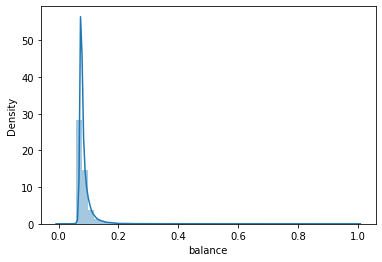

In [110]:
sns.distplot(temp_df['balance'])

In [113]:
model_dict = {}
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
params = {'l1_ratio': [0.5], 'max_iter': [3000],  'penalty': ['elasticnet'], 'solver': ['saga']}
scoring = 'accuracy'
model_dict['LogisticReg'] = [lr,params,scoring]

#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
params = {}
scoring = 'roc_auc'
new_dict = {'RF':[rf,params,scoring]}

In [115]:
gscv(new_dict,X,y)

NameError: ignored

In [120]:
X = temp_df
y = ohe_col[['y']]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
my_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

ValueError: ignored

## Finding Correlation

In [90]:
bank_market.corr()

,age,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,y,is_contacted_bef
age,1.000000,-0.017879,0.097783,-0.185513,-0.015655,0.020132,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155,0.000753
default,-0.017879,1.000000,-0.066745,-0.006025,0.077234,-0.019933,0.009424,-0.010021,0.016822,-0.029979,-0.018329,-0.022419,-0.039519
balance,0.097783,-0.066745,1.000000,-0.068768,-0.084350,0.037331,0.004503,0.021564,-0.014578,0.003435,0.016674,0.052838,0.030213
housing,-0.185513,-0.006025,-0.068768,1.000000,0.041323,-0.208409,-0.027982,0.005075,-0.023599,0.124178,0.037076,-0.139173,0.063650
loan,-0.015655,0.077234,-0.084350,0.041323,1.000000,0.007211,0.011370,-0.012408,0.009980,-0.022754,-0.011043,-0.068185,-0.031212
contact,0.020132,-0.019933,0.037331,-0.208409,0.007211,1.000000,0.034103,0.014378,-0.004853,0.247068,0.154162,0.150935,0.291771
day,-0.009120,0.009424,0.004503,-0.027982,0.011370,0.034103,1.000000,-0.030209,0.162490,-0.093044,-0.051710,-0.028348,-0.086174
duration,-0.004648,-0.010021,0.021564,0.005075,-0.012408,0.014378,-0.030209,1.000000,-0.084569,-0.001569,0.001205,0.394521,0.003587
campaign,0.004760,0.016822,-0.014578,-0.023599,0.009980,-0.004853,0.162490,-0.084569,1.000000,-0.088628,-0.032855,-0.073172,-0.107973
pdays,-0.023758,-0.029979,0.003435,0.124178,-0.022754,0.247068,-0.093044,-0.001569,-0.088628,1.000000,0.454820,0.103621,0.870442


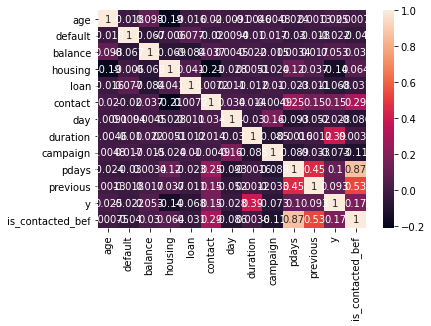

In [91]:
sns.heatmap(bank_market.corr(),annot=True)

As per the pairplot, correlation matrix, and heatmap, observations as follow:

Data is non-linear, asymmetric
Hence selection of features will not depend upon correlation factor.

Also not a single feature is correlated completely with class, hence requires combinantion of features.